In [96]:
import os
import pickle
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [97]:
path = 'figures'

enemy_group = [1, 2, 5]
run_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

enemy_group_str = ','.join(str(enemy) for enemy in enemy_group)

In [98]:
def get_avg(genfitnessvs, gengainvs):

    fit_averages_all = []
    fit_max_all = []
    for genfitnessv in genfitnessvs:
        fit_averages = [np.mean(gen) for gen in genfitnessv]
        fit_max = [max(gen) for gen in genfitnessv]
        fit_averages_all.append(fit_averages)
        fit_max_all.append(fit_max)

    fit_averages_all = np.mean(np.array(fit_averages_all), axis=0)
    fit_max_all = np.mean(np.array(fit_max_all), axis=0)

    gain_averages_all = []
    gain_max_all = []

    for gengainv in gengainvs:
        gain_averages = [np.mean(gen) for gen in gengainv]
        gain_max = [max(gen) for gen in gengainv]
        gain_averages_all.append(gain_averages)
        gain_max_all.append(gain_max)

    gain_averages_all = np.mean(np.array(gain_averages_all), axis=0)
    gain_max_all = np.mean(np.array(gain_max_all), axis=0)

    return fit_averages_all, fit_max_all, gain_averages_all, gain_max_all



In [99]:
def show_graph(fit_averages_all, fit_max_all, gain_averages_all, gain_max_all):

    plt.plot(fit_averages_all, 'b', label="fitmean")
    plt.plot(fit_max_all, 'b--', label="fitmax")
    plt.title(f"Neat Fitness Results for enemy group {','.join(str(enemy) for enemy in enemy_group)}")
    plt.xlabel("Generations")
    plt.ylabel("Fitness")

    save_fig("fitness.png")
    plt.show()

    plt.plot(gain_averages_all, 'r', label="gainmean")
    plt.plot(gain_max_all, 'r--', label="gainmax")
    plt.title(f"Neat Gain Results for enemy group {','.join(str(enemy) for enemy in enemy_group)}")
    plt.xlabel("Generations")
    plt.ylabel("Gain")

    save_fig("gain.png")
    plt.show()

In [100]:
def save_fig(name):
    fig_path = os.path.join(path, enemy_group_str)
    Path(fig_path).mkdir(parents=True, exist_ok=True)
    plt.savefig(os.path.join(fig_path, name))

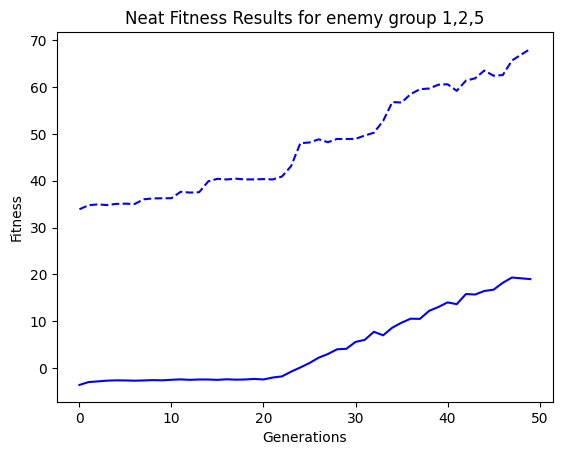

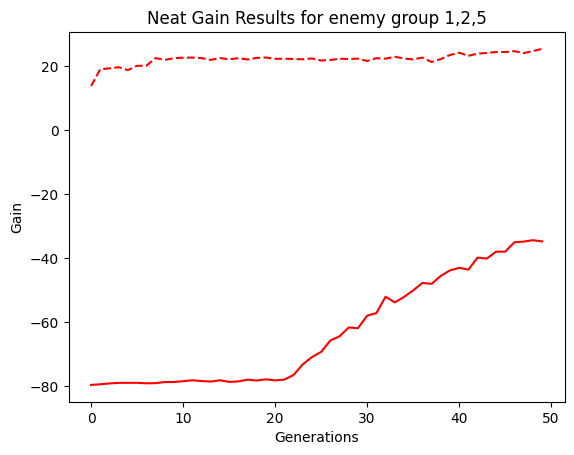

In [101]:
genfitnessvs = []
gengainvs = []
for run_id in run_ids:
    with open(os.path.join(enemy_group_str, f"run_{run_id}", 'genfitnessv'), 'rb') as f:
        genfitnessv = pickle.load(f)
        genfitnessvs.append(genfitnessv)
    with open(os.path.join(enemy_group_str, f"run_{run_id}", 'gengainv'), 'rb') as f:
        gengainv = pickle.load(f)
        gengainvs.append(gengainv)

fit_averages_all, fit_max_all, gain_averages_all, gain_max_all = get_avg(genfitnessvs, gengainvs)
show_graph(fit_averages_all, fit_max_all, gain_averages_all, gain_max_all)